# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

### FUZZY LOGIC SYSTEM WITH DATA FROM PERSON1 & PERSON2

The following will be done in this notebook:
- Setting up fuzzy rule base criterias for the features and health indicators from the Health trackers.
- Combine and "Defuzzify" to give crisp value for health status of an individual.
- Calculate the accuracy for the Fuzzy logic system created.

The following variables will be used (membership functions will be defined according to studies researched:
- Sleep Duration
- Active Duration
- Number of Steps
- Sleep Efficiency
- Resting Heart Rate, RHR
- HRV values (SD_PP_Interval, RMS_PP_diff)

Further work:
- Improve the performance of the trained model using Classifiers, Regression models or Neural Network etc.

For Fuzzy Logic, the library "skfuzzy" was used. See https://pythonhosted.org/scikit-fuzzy/ for documentations. 
Basic Memembership functions like Triangular and Trapezoidal functions will be used.

Generic Steps:
1. Create Input Membership Functions defining Low, Mid, High values for the variable.
2. Create Output Membership Function : Health_Score
3. Define input values for the variables for Fuzzy Logic System.
4. Finding the Degree of membership for each input values using the respective membership function.
5. Combine aggregate and find the Healh Score.

In [3]:
# Import library

import numpy as np
import skfuzzy as fuzz # scikit-fuzzy (Version 2.0)
import matplotlib.pyplot as plt

In [4]:
def Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text):
    '''Create and plots Fuzzy 3 value (Low, mid, high) membership functions (two trapezoid for HIGH and LOW, one triangle for MID):
    Inputs: 
    - max_val, min_val of the range
    - list_of_range: [low value, mid value, high value]
    - list_of_label: list of Text labels/Meanings for Low, Mid and High, [low,mid,high]
    - plot_text: list of str For plotting, [name, x_label]
    
    Returns: Dict - {"low":mf_name_low, 
                    "mid":mf_name_mid, 
                    "high":mf_name_high}
                    
    Plots out the shape of the mfs for visualisation
    '''
    
    # Specifying x range:
    x_name = np.arange(min_val,max_val, 1)
    low, mid, high = list_of_range[0],list_of_range[1],list_of_range[2]

    # Specifying Membership Function:
    mf_name_low = fuzz.trapmf(x_name,[min_val,min_val,low,mid])
    mf_name_mid = fuzz.trimf(x_name,[low,mid,high])
    mf_name_high = fuzz.trapmf(x_name,[mid,high,max_val,max_val])

    # Visualising the Membership Function:
    plt.figure(figsize=(10,5))
    plt.plot(x_name, mf_name_low, 'r', linewidth=1.5, label=list_of_label[0])
    plt.plot(x_name, mf_name_mid, 'b', linewidth=1.5, label=list_of_label[1])
    plt.plot(x_name, mf_name_high, 'g', linewidth=1.5, label=list_of_label[2])

    plt.title('Membership Functions for '+plot_text[0])
    plt.ylabel('Membership')
    plt.xlabel(plot_text[1])
    plt.legend()
    plt.show()
    
    return {'low':mf_name_low,'mid':mf_name_mid,'high':mf_name_high}
    

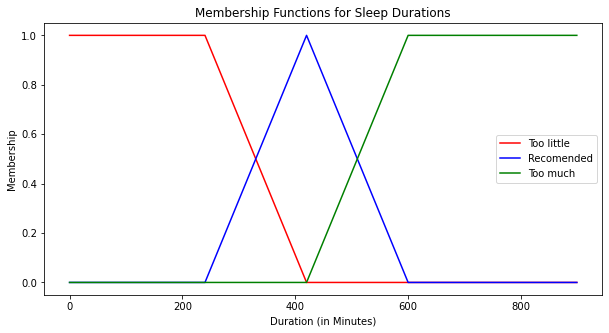

In [5]:
# Creating Fuzzy membership functions:

# For Sleep Durations (which recomended is 7 hours):
# "Too little", x < 5 hours, Trapezoid membership function
# "Recomended" , 4<=7<=10 hours, Triangle membership function
# "Too much" , x > 9 hours, Trapezoid membership function

min_val = 0
max_val = 15*60
list_of_range = [4*60,7*60,10*60] # in minutes
list_of_label = ["Too little","Recomended","Too much"]
plot_text = ["Sleep Durations","Duration (in Minutes)"]

x_sleep_duration = np.arange(min_val,max_val, 1)
mf_sleep_duration = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


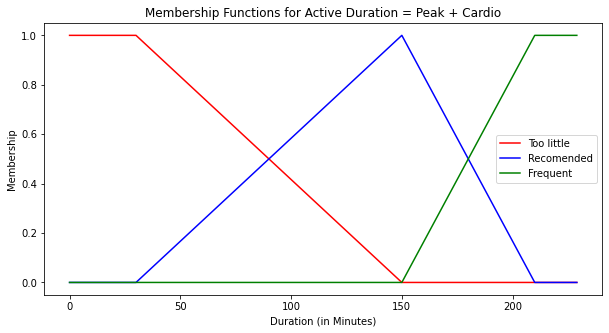

In [6]:
# Creating Fuzzy membership functions:

# For Active Duration = Peak_minutes + Cardio_minutes (which recomended is 150 minutes/ week, 30 mins for 5 days):
# "Little", x < 30 mins, Trapezoid membership function
# "Recomended" , 30<=150<=210 mins, Triangle membership function
# "Frequent" , x > 210 mins, Trapezoid membership function

min_val = 0
max_val = 230
list_of_range = [30,150,210] # in minutes
list_of_label = ["Too little","Recomended","Frequent"]
plot_text = ["Active Duration = Peak + Cardio","Duration (in Minutes)"]

x_active_duration = np.arange(min_val,max_val, 1)
mf_active_duration = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


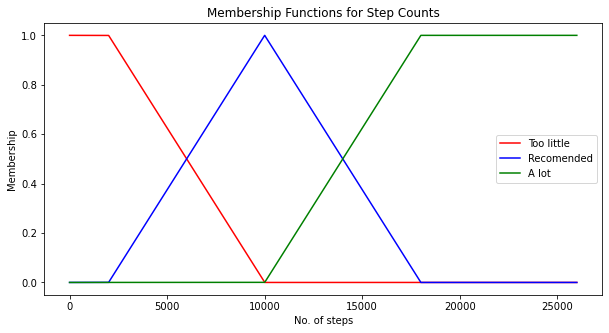

In [7]:
# Creating Fuzzy membership functions:

# For Number of Steps (which recomended is 10000):
# "Too little", x < 2000 hours, Trapezoid membership function
# "Recomended" , 2000 <=10000<=20000 hours, Triangle membership function
# "A lot" , x > 18000, Trapezoid membership function

min_val = 0
max_val = 26000
list_of_range = [2000,10000,18000]
list_of_label = ["Too little","Recomended","A lot"]
plot_text = ["Step Counts","No. of steps"]

x_step_counts = np.arange(min_val,max_val, 1)
mf_step_counts = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


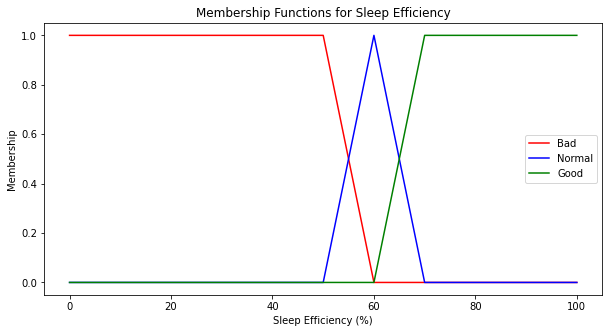

In [8]:
# Creating Fuzzy membership functions:

# For Sleep Efficiency (The higher the better):
# "Bad", x < 50 %, Trapezoid membership function
# "Normal" , 50<=60<=70 hours, Triangle membership function
# "Good" , x > 70, Trapezoid membership function

min_val = 0
max_val = 101
list_of_range = [50,60,70]
list_of_label = ["Bad","Normal","Good"]
plot_text = ["Sleep Efficiency","Sleep Efficiency (%)"]

x_sleep_efficiency = np.arange(min_val,max_val, 1)
mf_sleep_efficiency = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


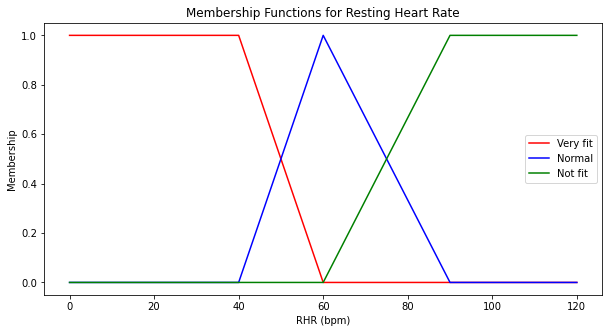

In [9]:
# Creating Fuzzy membership functions:

# For RHR (40 bpm  (very healthy), 50 - 70 (Normal), > 90 (unhealthy)):
# "Very fit", x < 40 bpm, Trapezoid membership function
# "Normal" , 40<=60<=90 hours, Triangle membership function
# "Not fit" , x > 90, Trapezoid membership function

min_val = 0
max_val = 121
list_of_range = [40,60,90]
list_of_label = ["Very fit","Normal","Not fit"]
plot_text = ["Resting Heart Rate","RHR (bpm)"]

x_rhr = np.arange(min_val,max_val, 1)
mf_rhr = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


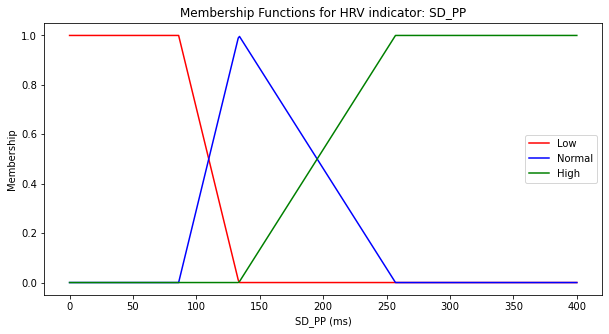

In [10]:
# Creating Fuzzy membership functions:

# For HRV indicator, SD_PP (The higher the better):
# "Low", x < 86 ms, Trapezoid membership function
# "Normal" , 86<=133.5<=257 ms, Triangle membership function
# "High" , x > 257 ms, Trapezoid membership function

min_val = 0
max_val = 401
list_of_range = [86,133.5,257]
list_of_label = ["Low","Normal","High"]
plot_text = ["HRV indicator: SD_PP","SD_PP (ms)"]

x_SD_PP = np.arange(min_val,max_val, 1)
mf_SD_PP = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


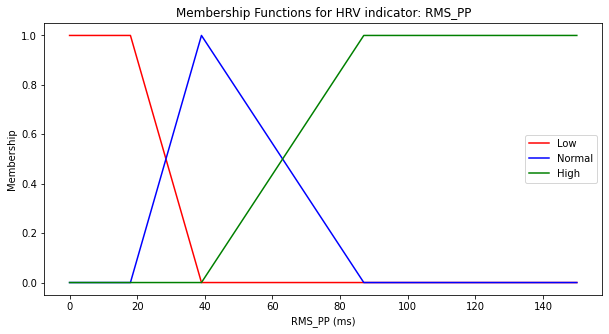

In [11]:
# Creating Fuzzy membership functions:

# For HRV indicator, RMS_PP (The higher the better):
# "Low", x < 18 ms, Trapezoid membership function
# "Normal" , 18<=39<=87 ms, Triangle membership function
# "High" , x > 87 ms, Trapezoid membership function

min_val = 0
max_val = 151
list_of_range = [18,39,87]
list_of_label = ["Low","Normal","High"]
plot_text = ["HRV indicator: RMS_PP","RMS_PP (ms)"]

x_RMS_PP = np.arange(min_val,max_val, 1)
mf_RMS_PP = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


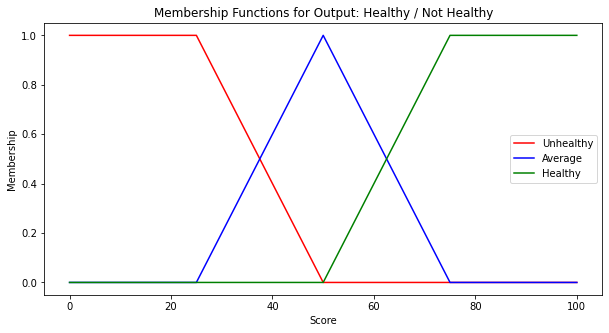

In [12]:
# Creating Fuzzy membership functions for Output:

# Output Function: HEALTHY or NOT HEALTHY
# "Unhealthy", x < 25, Trapezoid membership function
# "Average" , 25<=50<=75, Triangle membership function
# "Healthy" , x > 75, Trapezoid membership function

min_val = 0
max_val = 101
list_of_range = [25,50,75]
list_of_label = ["Unhealthy","Average","Healthy"]
plot_text = ["Output: Healthy / Not Healthy","Score"]

x_health_score = np.arange(min_val,max_val, 1)
mf_health_score = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


# CHANGE INPUTS HERE:

In [13]:
############# CHANGE HERE !!! #########

# Input Values:
INPUT_DICT = {
'sleep_duration' : 7*60, # in minutes / per day
'sleep_efficiency' : 90, # in percent
'active_duration' : 100, # in minutes / week
'step_counts' : 15000, 
'rhr' : 60, # in bpm
'SD_PP' : 200, # in mili-seconds
'RMS_PP' : 70 # in mili-seconds
}

# Run all below to find the Health Score.

In [14]:
# Using the same key as above INPUT_DICT:

# Membership Functions:

MF_DICT = {
'sleep_duration' : mf_sleep_duration,
'sleep_efficiency' : mf_sleep_efficiency,
'active_duration' : mf_active_duration,
'step_counts' : mf_step_counts, 
'rhr' : mf_rhr,
'SD_PP' : mf_SD_PP,
'RMS_PP' : mf_RMS_PP
}

In [15]:
# Using the same key as above INPUT_DICT:

# X Ranges for each variable:

X_RANGE_DICT = {
'sleep_duration' : x_sleep_duration,
'sleep_efficiency' : x_sleep_efficiency,
'active_duration' : x_active_duration,
'step_counts' : x_step_counts, 
'rhr' : x_rhr,
'SD_PP' : x_SD_PP,
'RMS_PP' : x_RMS_PP
}

In [16]:
# Finding the degree of membership for the respective Inputs:

# Degree of Membership Dict:
DEGREE_DICT = {}

for xxx in INPUT_DICT.keys():
    DEGREE_DICT[xxx] = {
        'low' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['low'],INPUT_DICT[xxx]),
        'mid' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['mid'],INPUT_DICT[xxx]),
        'high': fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['high'],INPUT_DICT[xxx])
        }
DEGREE_DICT

{'sleep_duration': {'low': 0.0, 'mid': 1.0, 'high': 0.0},
 'sleep_efficiency': {'low': 0.0, 'mid': 0.0, 'high': 1.0},
 'active_duration': {'low': 0.4166666666666667,
  'mid': 0.5833333333333334,
  'high': 0.0},
 'step_counts': {'low': 0.0, 'mid': 0.375, 'high': 0.625},
 'rhr': {'low': 0.0, 'mid': 1.0, 'high': 0.0},
 'SD_PP': {'low': 0.0, 'mid': 0.46153846153846156, 'high': 0.5384615384615384},
 'RMS_PP': {'low': 0.0, 'mid': 0.3541666666666667, 'high': 0.6458333333333334}}

# Defining Fuzzy Rules (Can be ajusted whenever there are more expert inputs / complex combination)


## Method #1:
### Combining all the variables to give the overall health score.

#### Mapping the input membership functions to the result membership function using Fuzzy Operators: 
(OR = Union = np.fmax, AND = Intersect = np.fmin) ->float, element-wise comparison

- Rule 1: If EITHER 
        - Sleep Duration is High OR Low, 
        - Active duration, sleep_efficiency, SD_PP, RMS_PP is Low, 
        - RHR is High, the person is Unhealthy.
- Rule 2: If all the variables are at the Recommended / Normal amount, health is Average.
- Rule 3: Only If the 
        - Active Duration and Step counts are at Recommended amount OR higher,
        - AND the Sleep duration is at recommended amount,
        - AND the RHR is Low,
        - AND the rest of the variables are HIGH, the person is Healthy.


In [17]:

# Applying the Fuzzy Rule #1, IF either one is Low or RHR is high, Healthy = low:

degree_list = [DEGREE_DICT[i]['low'] for i in DEGREE_DICT.keys() if i is not 'rhr' and i is not 'sleep_duration'] 
# all the low degree that is unhealthy

rule_1 = 0 # initialize

for i in range(len(degree_list)-1): # since np.fmax / np.min only takes 2 input at a time
    rule_1 = np.fmax(rule_1,np.fmax(degree_list[i],degree_list[i+1]))

# taking the max of the the rest and the last indicators:
rule_1 = np.fmax(DEGREE_DICT['rhr']['high'],rule_1)
rule_1 = np.fmax(rule_1,
                np.fmax(DEGREE_DICT['sleep_duration']['low'],
                       DEGREE_DICT['sleep_duration']['high'])
                )

# Map over to Output membership function (by Intersection) / clipping away the Output function:
degree_health_score_low = np.fmin(rule_1,mf_health_score['low'])

# print("Health_low:",degree_health_score_low)
rule_1

0.4166666666666667

In [18]:
# Applying the Fuzzy Rule #2, IF either one is mid, Healthy = mid:

degree_list = [DEGREE_DICT[i]['mid'] for i in DEGREE_DICT.keys() if i is not 'rhr'] # all the low degree that is unhealthy

rule_2 = 0 # initialize

for i in range(len(degree_list)-1): # since np.fmax / np.min only takes 2 input at a time
    rule_2 = np.fmax(rule_2,np.fmax(degree_list[i],degree_list[i+1]))

# taking the max of the the rest and the last indicator:
rule_2 = np.fmax(DEGREE_DICT['rhr']['mid'],rule_2)

# Map over to Output membership function (by Intersection):
degree_health_score_mid = np.fmin(rule_2,mf_health_score['mid'])

# print("Health_mid:",degree_health_score_mid)
rule_2

1.0

In [19]:
# Applying the Fuzzy Rule #3, 
# IF sleep_duration = mid 
# AND active_duration, step_counts = mid OR high
# AND RHR is Low 
# AND the rest = High, Healthy = High:

rule_3 = 0 # initialize

# Intersect of All the degree 'High':
rule_3a = np.fmin(DEGREE_DICT['sleep_efficiency']['high'],
                  np.fmin(DEGREE_DICT['SD_PP']['high'],DEGREE_DICT['RMS_PP']['high']))

# Intersect for active_duration, step_counts = mid OR high
rule_3b = np.fmin(np.fmax(DEGREE_DICT['active_duration']['high'],DEGREE_DICT['active_duration']['mid']),
                  np.fmax(DEGREE_DICT['step_counts']['high'],DEGREE_DICT['step_counts']['mid']))

# Combine Intersect with RHR = low, rule_3a, rule_3b
rule_3 = np.fmin(DEGREE_DICT['rhr']['low'],
                 np.fmin(rule_3a , rule_3b))

# Mapping over to Output membership function (by Intersection):
degree_health_score_high = np.fmin(rule_3,mf_health_score['high'])

# print("Health_high:",degree_health_score_high)
rule_3

0.0

### Overall Health Score From Method #1


The Aggregated Health Score is: 38.364

Degree:
Health Unhealthy: 0.465
Health Average: 0.535
Health Healthy: 0.0


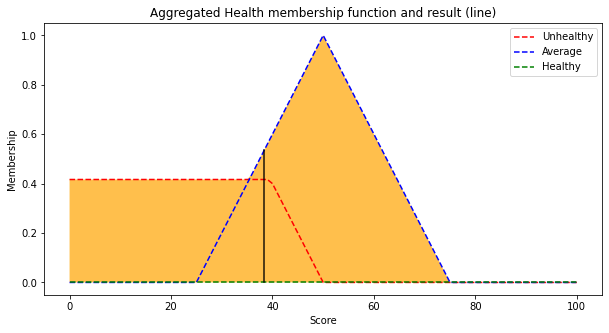

In [20]:
# Aggregate all the membership functions together (Union):
aggregated = np.fmax(degree_health_score_low, 
                     np.fmax(degree_health_score_mid, degree_health_score_high))

# Calculate defuzzified result:
Health_Score = fuzz.defuzz(x_health_score, aggregated, 'centroid')
plot_line_health = fuzz.interp_membership(x_health_score, aggregated, Health_Score)  # for plotting

# find the degree of health from the DeFuzzified value
# find the pair the plot line intersects
# Output example: 0.8 healthy, 0.2 Average

fz_health_score_low = fuzz.interp_membership(x_health_score,mf_health_score['low'], Health_Score)
fz_health_score_mid = fuzz.interp_membership(x_health_score,mf_health_score['mid'], Health_Score)
fz_health_score_high = fuzz.interp_membership(x_health_score,mf_health_score['high'], Health_Score)

# Printing out the overall result:
print("\nThe Aggregated Health Score is:", np.round(Health_Score,3))
print("\nDegree:\nHealth Unhealthy:", np.round(fz_health_score_low,3))
print("Health Average:", np.round(fz_health_score_mid,3))
print("Health Healthy:", np.round(fz_health_score_high,3))

# Visualize the result:
plt.figure(figsize=(10,5))

plt.plot(x_health_score, degree_health_score_low, '--r', linewidth=1.5, label='Unhealthy')
plt.plot(x_health_score, degree_health_score_mid, '--b', linewidth=1.5, label='Average')
plt.plot(x_health_score, degree_health_score_high, '--g', linewidth=1.5, label='Healthy')

plt.fill_between(x_health_score, np.zeros_like(x_health_score), aggregated, facecolor='Orange', alpha=0.7)

plt.plot([Health_Score, Health_Score], [0, plot_line_health], 'k', linewidth=1.5, alpha=0.9)

plt.title('Aggregated Health membership function and result (line)')
plt.xlabel('Score')
plt.ylabel('Membership')
plt.legend()
plt.show()

for #1, 
1. find which variable is in the unhealthy range.
2. Match up table for recomended action from DEGREE_DICT.

Sleep
- Sleep Duration
- Sleep Efficiency

Activity
- Active Duration
- Number of Steps

Heart Health
- SD_PP_Interval
- RMS_PP_diff
- RHR


In [21]:
# Putting into Dataframe for easier comparison

import pandas as pd
Deg_Variables = pd.DataFrame(DEGREE_DICT)
Deg_Variables

,sleep_duration,sleep_efficiency,active_duration,step_counts,rhr,SD_PP,RMS_PP
low,0.0,0.0,0.416667,0.000,0.0,0.000000,0.000000
mid,1.0,0.0,0.583333,0.375,1.0,0.461538,0.354167
high,0.0,1.0,0.000000,0.625,0.0,0.538462,0.645833


In [22]:
# After Transpose, criteria can be easier applied.

Deg_Variables_T = Deg_Variables.transpose()
Deg_Variables_T.loc[Deg_Variables_T.low > 0.5]

,low,mid,high


In [23]:
# Putting Output into Dataframe

Deg_Output = pd.DataFrame({'health_score':{ 'low':fz_health_score_low,
                                            'mid':fz_health_score_mid,
                                            'high':fz_health_score_high}
             })

Deg_Output

,health_score
high,0.000000
low,0.465437
mid,0.534563


## Method #2:
### Splitting the variables to compute serperate scores:

In comparison, the Overall Health Score can still be Split into the following:
- Active Score
- Sleep Score
- Heart Score

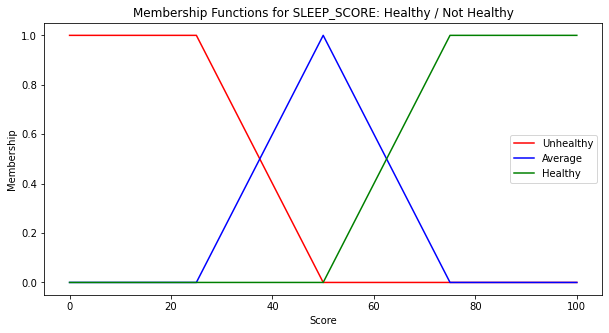

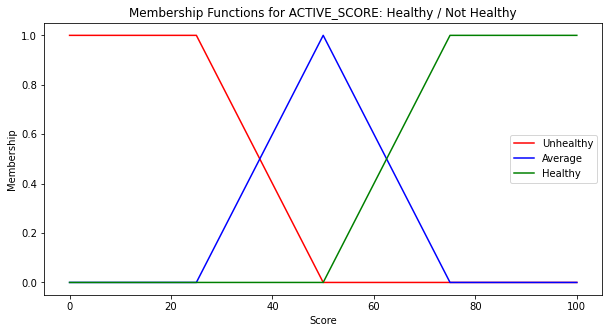

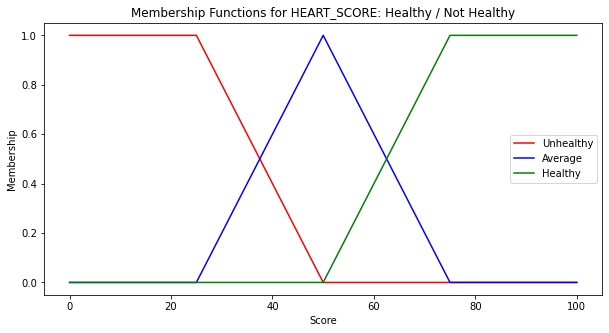

In [24]:
# Creating the Membership Function:

score = ['sleep_score','active_score','heart_score']

MF_DICT = {}
min_val = 0
max_val = 101
list_of_range = [25,50,75]
list_of_label = ["Unhealthy","Average","Healthy"]
x_range = np.arange(min_val,max_val, 1)

for s in score:

    plot_text = [s.upper()+": Healthy / Not Healthy","Score"]
    MF_DICT[s] = Create_Membership(min_val,max_val,list_of_range,list_of_label,plot_text)


In [25]:
# Applying Fuzzy similar to Health but for Sleep, Activity and Heart:

active_col = ['active_duration','step_counts']
sleep_col = ['sleep_duration','sleep_efficiency']
heart_col = ['rhr','SD_PP','RMS_PP']

SCORE_DEGREE_DICT = {}

plots = {score[0]:sleep_col,score[1]:active_col,score[2]:heart_col}

### Sleep Score

In [26]:
# FOR SLEEP ['sleep_duration','sleep_efficiency']:

xxx = 'sleep_score'

DEGREE_DICT = {}

# Rule 1: Union (duration = Low OR High) OR sleep Efficiency = Low, score = low:
rule_1 = np.fmax(Deg_Variables_T.loc[plots[xxx][1],'low'],
                  np.fmax(Deg_Variables_T.loc[plots[xxx][0],'low'],
                          Deg_Variables_T.loc[plots[xxx][0],'high']))

DEGREE_DICT['low'] = np.fmin(rule_1,MF_DICT[xxx]['low'])

# Rule 2: Union of All the degree 'Mid', score = Mid:
rule_2 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                  Deg_Variables_T.loc[plots[xxx][1],'mid'])

DEGREE_DICT['mid'] = np.fmin(rule_2,MF_DICT[xxx]['mid'])

# For Sleep Rule 3: Intersect of Sleep duration = Mid, Efficiency = Mid or High , Score = High:
rule_3 = np.fmin(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                 Deg_Variables_T.loc[plots[xxx][1],'mid']) 
#                  np.fmax(Deg_Variables_T.loc[plots[xxx][1],'high'],
#                           Deg_Variables_T.loc[plots[xxx][1],'mid']))

DEGREE_DICT['high'] = np.fmin(rule_3,MF_DICT[xxx]['high'])

# Aggregate all the membership functions together (Union):
aggregated = np.fmax(DEGREE_DICT['low'], 
                     np.fmax(DEGREE_DICT['mid'], DEGREE_DICT['high']))

# Calculate defuzzified result:
DEGREE_DICT['Score'] = fuzz.defuzz(x_range, aggregated, 'centroid')

# Store in a Dict for all the scores:
SCORE_DEGREE_DICT[xxx] = DEGREE_DICT
                 

### Activity Score

In [27]:
# FOR Activity ['active_duration','step_counts']:

xxx = 'active_score'

DEGREE_DICT = {}

# Rule 1: Union duration = Low OR step count = Low, score = low:
rule_1 = np.fmax(Deg_Variables_T.loc[plots[xxx][1],'low'],
                 Deg_Variables_T.loc[plots[xxx][0],'low'])

DEGREE_DICT['low'] = np.fmin(rule_1,MF_DICT[xxx]['low'])

# Rule 2: Union of All the degree 'Mid', score = Mid:
rule_2 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                  Deg_Variables_T.loc[plots[xxx][1],'mid'])

DEGREE_DICT['mid'] = np.fmin(rule_2,MF_DICT[xxx]['mid'])

# For Sleep Rule 3: Intersect of duration and step count = Mid or High, Score = High:
rule_3 = np.fmin(np.fmax(Deg_Variables_T.loc[plots[xxx][0],'high'],
                  Deg_Variables_T.loc[plots[xxx][0],'mid']),
                 np.fmax(Deg_Variables_T.loc[plots[xxx][1],'high'],
                  Deg_Variables_T.loc[plots[xxx][1],'mid']))

DEGREE_DICT['high'] = np.fmin(rule_3,MF_DICT[xxx]['high'])

# Aggregate all the membership functions together (Union):
aggregated = np.fmax(DEGREE_DICT['low'], 
                     np.fmax(DEGREE_DICT['mid'], DEGREE_DICT['high']))

# Calculate defuzzified result:
DEGREE_DICT['Score'] = fuzz.defuzz(x_range, aggregated, 'centroid')

# Store in a Dict for all the scores:
SCORE_DEGREE_DICT[xxx] = DEGREE_DICT


### Heart Score

In [28]:
# FOR Heart Health ['rhr','SD_PP','RMS_PP']:

xxx = 'heart_score'

DEGREE_DICT = {}

# Rule 1: Union SD_PP OR RMS_PP = low OR RHR = High, score = low:
rule_1 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'high'],
                 np.fmax(Deg_Variables_T.loc[plots[xxx][1],'low'],
                         Deg_Variables_T.loc[plots[xxx][2],'low']))

DEGREE_DICT['low'] = np.fmin(rule_1,MF_DICT[xxx]['low'])

# Rule 2: Union of All the degree 'Mid', score = Mid:
rule_2 = np.fmax(Deg_Variables_T.loc[plots[xxx][0],'mid'],
                 np.fmax(Deg_Variables_T.loc[plots[xxx][1],'mid'],
                         Deg_Variables_T.loc[plots[xxx][2],'mid']))

DEGREE_DICT['mid'] = np.fmin(rule_2,MF_DICT[xxx]['mid'])

# For Sleep Rule 3: Intersect of duration and RHR = Low AND SD_PP, RMS_PP = High, Score = High:
rule_3 = np.fmin(Deg_Variables_T.loc[plots[xxx][0],'low'],
                 np.fmax(Deg_Variables_T.loc[plots[xxx][1],'high'],
                         Deg_Variables_T.loc[plots[xxx][2],'high']))

DEGREE_DICT['high'] = np.fmin(rule_3,MF_DICT[xxx]['high'])

# Aggregate all the membership functions together (Union):
aggregated = np.fmax(DEGREE_DICT['low'], 
                     np.fmax(DEGREE_DICT['mid'], DEGREE_DICT['high']))

# Calculate defuzzified result:
DEGREE_DICT['Score'] = fuzz.defuzz(x_range, aggregated, 'centroid')

# Store in a Dict for all the scores:
SCORE_DEGREE_DICT[xxx] = DEGREE_DICT


In [29]:
# OVERALL HEALTH SCORE (combine fuzzy scores):

# Finding the Degree of membership:

for xxx in score:
    SCORE_DEGREE_DICT[xxx]['low'] = fuzz.interp_membership(x_range,MF_DICT[xxx]['low'],SCORE_DEGREE_DICT[xxx]['Score'])
    SCORE_DEGREE_DICT[xxx]['mid'] = fuzz.interp_membership(x_range,MF_DICT[xxx]['mid'],SCORE_DEGREE_DICT[xxx]['Score'])
    SCORE_DEGREE_DICT[xxx]['high'] = fuzz.interp_membership(x_range,MF_DICT[xxx]['high'],SCORE_DEGREE_DICT[xxx]['Score'])

# Applying Fuzzy Rules:
# Rule 1: Sleep OR Activity OR Heart Score is Low, score = Low:

rule_1 = np.fmax(SCORE_DEGREE_DICT[score[0]]['low'],
                 np.fmax(SCORE_DEGREE_DICT[score[1]]['low'],
                         SCORE_DEGREE_DICT[score[2]]['low']))

# Mapping over to Output membership function (by Intersection):
degree_health_score_low = np.fmin(rule_1,mf_health_score['low'])

# Rule 2: Sleep OR Activity OR Heart Score is Mid, score = Mid:
rule_2 = np.fmax(SCORE_DEGREE_DICT[score[0]]['mid'],
                 np.fmax(SCORE_DEGREE_DICT[score[1]]['mid'],
                         SCORE_DEGREE_DICT[score[2]]['mid']))

degree_health_score_mid = np.fmin(rule_2,mf_health_score['mid'])

# For Sleep Rule 3: Sleep AND Activity AND Heart Score is High, Score = High:
rule_3 = np.fmax(SCORE_DEGREE_DICT[score[0]]['high'],
                 np.fmax(SCORE_DEGREE_DICT[score[1]]['high'],
                         SCORE_DEGREE_DICT[score[2]]['high']))

degree_health_score_high = np.fmin(rule_3,mf_health_score['high'])
   

### Overall Health Score from Method #2:

sleep_score: 50.0
active_score: 53.7180804383655
heart_score: 50.0

The Aggregated Health Score is: 55.038

Degree:
Health Unhealthy: 0.0
Health Average: 0.798
Health Healthy: 0.202


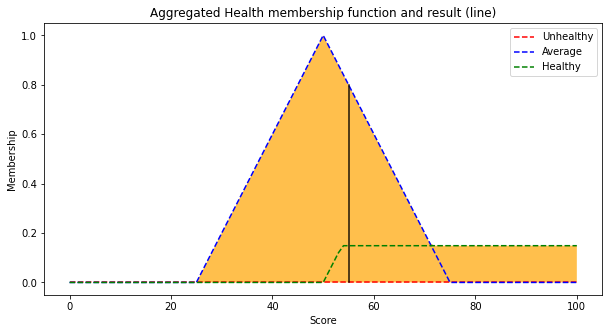

In [30]:
# Aggregate all the membership functions together (Union):
aggregated = np.fmax(degree_health_score_low, 
                     np.fmax(degree_health_score_mid, degree_health_score_high))

# Calculate defuzzified result:
Health_Score = fuzz.defuzz(x_health_score, aggregated, 'centroid')
plot_line_health = fuzz.interp_membership(x_health_score, aggregated, Health_Score)  # for plotting

# find the degree of health from the DeFuzzified value
# find the pair the plot line intersects
# Output example: 0.8 healthy, 0.2 Average

fz_health_score_low = fuzz.interp_membership(x_health_score,mf_health_score['low'], Health_Score)
fz_health_score_mid = fuzz.interp_membership(x_health_score,mf_health_score['mid'], Health_Score)
fz_health_score_high = fuzz.interp_membership(x_health_score,mf_health_score['high'], Health_Score)

# Printing out the overall result:
for xxx in score:
    print(xxx+':',SCORE_DEGREE_DICT[xxx]['Score'])
print("\nThe Aggregated Health Score is:", np.round(Health_Score,3))
print("\nDegree:\nHealth Unhealthy:", np.round(fz_health_score_low,3))
print("Health Average:", np.round(fz_health_score_mid,3))
print("Health Healthy:", np.round(fz_health_score_high,3))

# Visualize the result:
plt.figure(figsize=(10,5))

plt.plot(x_health_score, degree_health_score_low, '--r', linewidth=1.5, label='Unhealthy')
plt.plot(x_health_score, degree_health_score_mid, '--b', linewidth=1.5, label='Average')
plt.plot(x_health_score, degree_health_score_high, '--g', linewidth=1.5, label='Healthy')

plt.fill_between(x_health_score, np.zeros_like(x_health_score), aggregated, facecolor='Orange', alpha=0.7)

plt.plot([Health_Score, Health_Score], [0, plot_line_health], 'k', linewidth=1.5, alpha=0.9)

plt.title('Aggregated Health membership function and result (line)')
plt.xlabel('Score')
plt.ylabel('Membership')
plt.legend()
plt.show()

In comparison of the 2 methods, the overall health score from Method #2 fluctuates more with the changes in Sleep, Activity and Heart health indicators. Method #2 provides a mean to adjust the rules between the groups. 
However, Method #1 will be preferable if "weights" were to be catered with reference to each variable as a group.


### Recomending Actions:

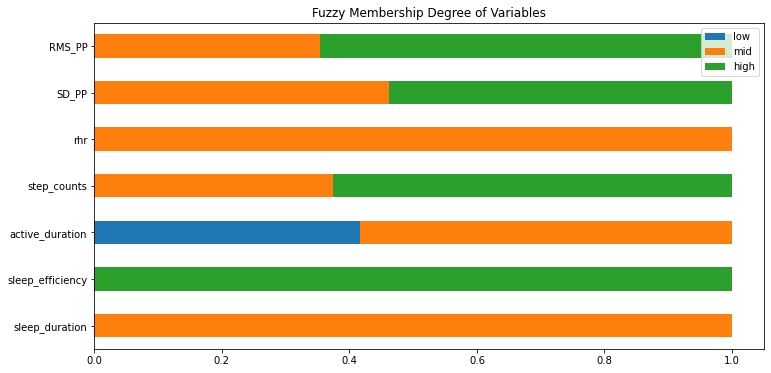

In [31]:
# Viewing the degree in graphical form:

Deg_Variables_T.plot.barh(stacked=True,figsize=(12,6),title="Fuzzy Membership Degree of Variables")

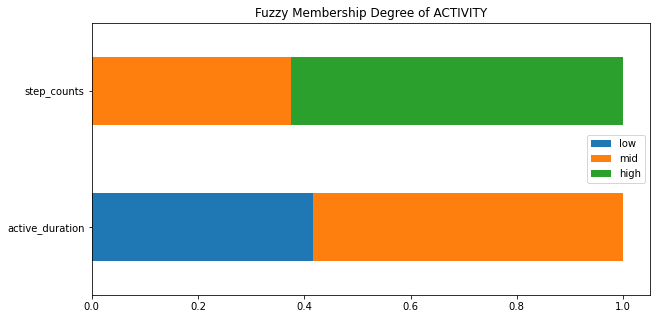

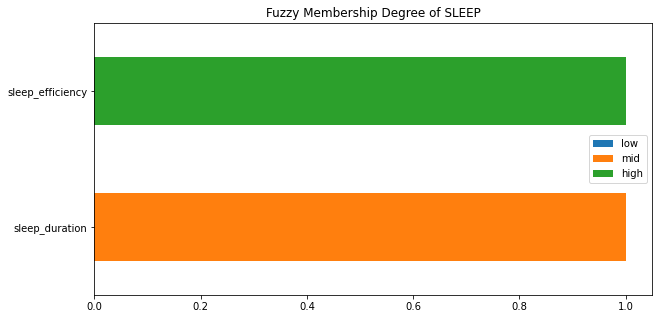

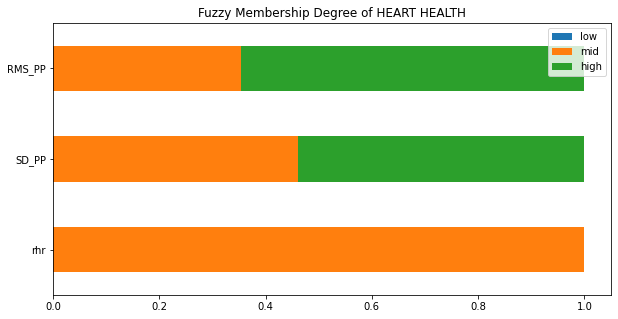

In [32]:
# View by catagory

active_col = ['active_duration','step_counts']
sleep_col = ['sleep_duration','sleep_efficiency']
heart_col = ['rhr','SD_PP','RMS_PP']

plots = {'Activity':active_col,'Sleep':sleep_col,'Heart Health':heart_col}

for p in plots.keys():
    Deg_Variables[plots[p]].transpose().plot.barh(stacked=True,figsize=(10,5),title="Fuzzy Membership Degree of "+p.upper())

In [33]:
# Creating a matchup table from "Deg_Variables":

def match_action(x):
    if x['low'] >= 0.65 and x.name != 'rhr': # Majority Low for any indicators Except RHR is Unhealthy
        return "Needs to improve"
    if x['high'] >= 0.65 and x.name == 'rhr': # Majority High for RHR is Unhealthy
        return "Needs to improve"
    if x['high'] >= 0.65 and x.name == 'sleep_duration': # Majority High for RHR is Unhealthy
        return "Sleep too much"
    else:
        return "OK"

# Appling to the transpose of the Deg_Variables: 
for p in plots.keys():
    print('\n'+p,':\n'+'='*15)
    action = Deg_Variables[plots[p]].transpose().apply(match_action,axis=1)
    
    for i in plots[p]:
        print("{}.....\t{}".format(i.ljust(20), action.loc[i]))
    


Activity :
active_duration     .....	OK
step_counts         .....	OK

Sleep :
sleep_duration      .....	OK
sleep_efficiency    .....	OK

Heart Health :
rhr                 .....	OK
SD_PP               .....	OK
RMS_PP              .....	OK


In [60]:
# adapted from https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

def plot_spider_chart(labels,breakdown_val,overall_score):
    
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    breakdown_val=np.concatenate((breakdown_val,[breakdown_val[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, breakdown_val, 'o-', linewidth=2)
    ax.fill(angles, breakdown_val, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Overall Health Score:'+str(overall_score))
    ax.grid(True)

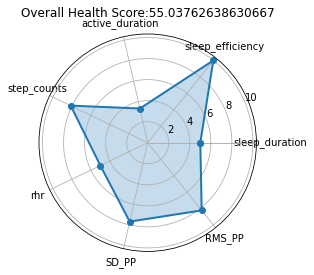

In [59]:
int_values = Deg_Variables.copy().transpose()
int_values.low = int_values.low*1
int_values.mid = int_values.mid*5
int_values.high = int_values.high*10
int_values = int_values.sum(axis=1)

plot_spider_chart(Deg_Variables.columns.tolist(),int_values.values,Health_Score)